In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1k6vPDym7SOUGXZ5WFFm05ZdwWtL8Jg1qrMs95vhHyIa',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'custommodeldeployment-donotdelete-pr-azgkeuzvaom7wf'
object_key = 'water_dataX.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [3]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-83ecb90b-6d9c-41ca-b595-cb9d7b88d1d5',
    'IBM_API_KEY_ID': '1k6vPDym7SOUGXZ5WFFm05ZdwWtL8Jg1qrMs95vhHyIa',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'custommodeldeployment-donotdelete-pr-azgkeuzvaom7wf',
    'FILE': 'water_dataX.csv'
}
# Checking for datatypes of the dataset
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [4]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [5]:
# Changing column names
df = df.rename(columns={"D.O. (mg/l)": "DO", "CONDUCTIVITY (µmhos/cm)": "Conductivity", "B.O.D. (mg/l)": "BOD", "NITRATENAN N+ NITRITENANN (mg/l)": "NI", "FECAL COLIFORM (MPN/100ml)": "Fec_col", "TOTAL COLIFORM (MPN/100ml)Mean": "Tot_col"})

In [6]:
# Converting object data type to numeric
def convert_to_numeric(df):
    num_col = df.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

df = convert_to_numeric(df)
df.dtypes

STATION CODE     object
LOCATIONS        object
STATE            object
Temp            float64
DO              float64
PH              float64
Conductivity    float64
BOD             float64
NI              float64
Fec_col         float64
Tot_col         float64
year              int64
dtype: object

In [7]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(df):
    n_col = df.shape[1]
    for index in range(n_col):
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [8]:
# Checking for missing values
df.isnull().sum().sort_values()

year              0
PH                8
Conductivity     25
DO               31
BOD              43
Temp             92
STATION CODE    122
Tot_col         132
LOCATIONS       184
NI              225
Fec_col         316
STATE           761
dtype: int64

* Since I have 1900 training examples, I can replace each missing value with median of the column (to avoid outliers)

In [9]:
# Replacing NULL values with median of column
# Selecting numeric data
df_num = df.select_dtypes(exclude="object")
df_num_col = df_num.columns
imputer = SimpleImputer(strategy="median")

df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [10]:
# Filling Categorical missing values
df_cat = df.select_dtypes(include="object")
df_cat.isnull().sum()

STATION CODE    122
LOCATIONS       184
STATE           761
dtype: int64

In [11]:
# Here we can fill these values by obeserving other attributes
# Example - 
pd.set_option('mode.chained_assignment', None)
df_cat_copy = df_cat.copy()

df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]
# Station Code with value 1330 will have Location - TAMBIRAPARANI which belongs in STATE - TAMIL NADU
# I can replace all the NAN occurences in STATE with TAMILNADU
df_cat_copy["STATE"][df_cat_copy["STATION CODE"] == "1330"] = df_cat_copy["STATE"][df_cat_copy["STATION CODE"] == "1330"].fillna("TAMILNADU")

df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [12]:
# The NULL values in LOCATION attribute are in STATE attribute (ex - above dataframe)
# So, I will fill the NULL values in LOCATION attribute with the corresponding STATE value
# And, the state value will be replaced by the function "fill_state" defined below this cell

def fill_locations(df_cat):
    location_null = df_cat[df_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    df_cat[df_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(df_cat_copy)
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [13]:
df_cat_copy[df_cat_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [14]:
# Now I can fill NULL values of Station code with corresponding LOCATION value(ex - above dataframe)
# I will match the corresponding LOCATION value with other same LOCATION value and insert the value of station code

def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = df_cat["STATION CODE"][df_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_cat_copy)
df_cat_copy[df_cat_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [15]:
# Filling all state NAN values which have corresponding station code value
def fill_state(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] 
            state_values = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(df_cat_copy)
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [16]:
df_cat_copy.isnull().sum()

STATION CODE     5
LOCATIONS        3
STATE           13
dtype: int64

In [17]:
df_cat_copy[df_cat_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


* The above are the missing values which are left and does not satisfy any condition
* So, according to the location these values will be filled manually


In [18]:
# The first location KABBANI AT MUTHANKARA is in STATE Kerela
df_cat_copy["STATE"][1106] = "KERALA"
df_cat_copy["STATE"][1107] = "KERALA"
df_cat_copy["STATE"][1650] = "CHANDIGARH"
df_cat_copy["STATE"][1651] = "CHANDIGARH"
df_cat_copy["STATE"][1652] = "CHANDIGARH"
df_cat_copy["STATE"][1770] = "CHANDIGARH"
df_cat_copy["STATE"][1771] = "CHANDIGARH"
df_cat_copy["STATE"][1772] = "CHANDIGARH"
df_cat_copy["STATE"][1784] = "DAMAN & DIU"
df_cat_copy["STATE"][1785] = "DAMAN & DIU"
df_cat_copy["STATION CODE"][1784] = "0000" # I am setting this according to myself
df_cat_copy["STATION CODE"][1785] = "0000"

In [19]:
df_cat = df_cat_copy
df_cat.isnull().sum()

STATION CODE    3
LOCATIONS       3
STATE           3
dtype: int64

In [20]:
df_num.isnull().sum()

Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [21]:
df_final = pd.concat([df_cat, df_num], axis=1)
df_final.isnull().sum()

STATION CODE    3
LOCATIONS       3
STATE           3
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [22]:
# These are the samples which don't contain any attribute
# The filled attributes are median of corresponding columns
# So it is best to remove them
df_null = df_final[(df_final["STATION CODE"].isnull()) & (df_final["LOCATIONS"].isnull()) & (df_final["STATE"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
260,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
1912,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2003.0


In [23]:
df_final.isnull().sum()

STATION CODE    0
LOCATIONS       0
STATE           0
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [24]:
df_final.shape

(1988, 12)

* The final dataset contains 1898 samples and 12 attributes

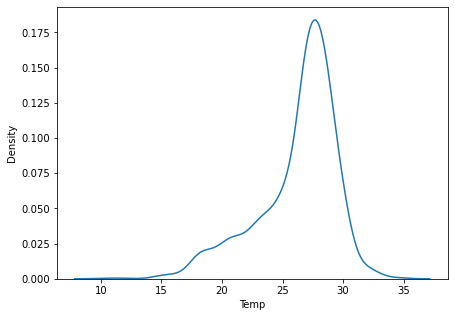

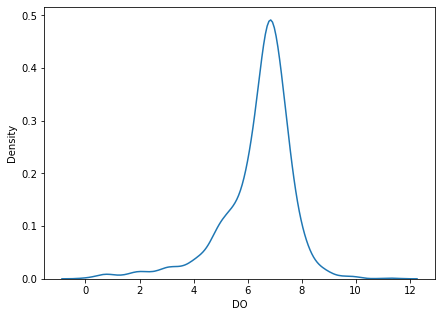

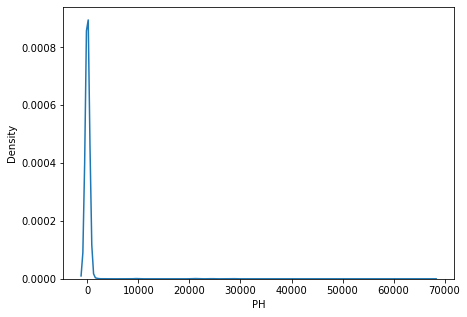

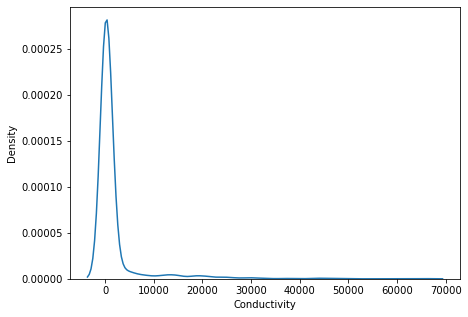

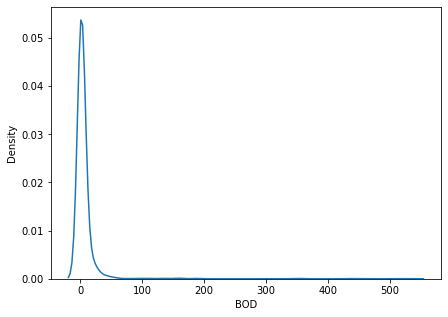

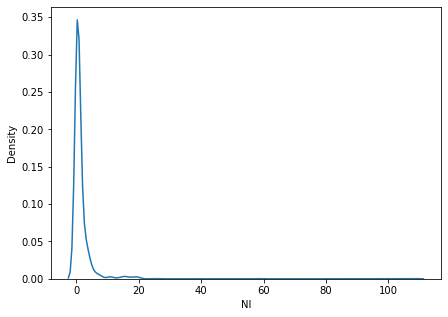

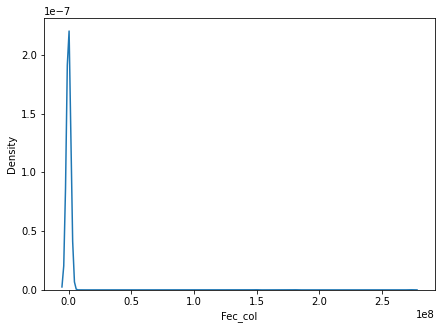

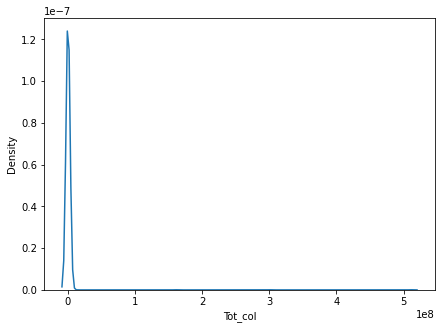

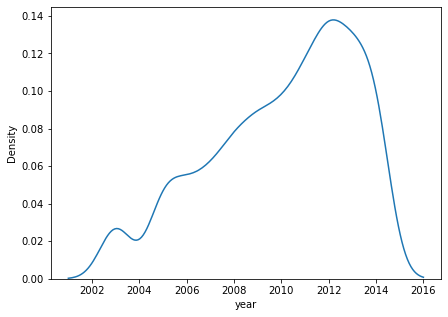

In [25]:
# PLotting PDFs of all the numeric attributes in the dataset

df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [26]:
# Here, almost all kde plots are Gaussian Like 
# Using Z-Score Normalization to detect outliers

df_num_final_norm = zscore(df_num_final, axis=0)


def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[: ,index]
        greater_than_3 = df_norm[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method-",len(indices_arr))
df_final.iloc[indices_arr, :]

Number of outliers using Z-Score method- 139


,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.0,8.2,7.6,112.0,2.1,0.516,221.0,31.0,2012.0
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.0,9.3,7.6,193.0,2.3,0.516,221.0,41.0,2012.0
1917,1862,RIVER KAVERI ON BRIDGE AT BILLIMORANANVALSAD ROAD,GUJARAT,29.0,8.1,467.0,7.1,3.0,0.516,221.0,107.0,2003.0
1924,1438,"MINDHOLA AT STATE HIGHWAY BRIDGE SACHIN, GUJARAT",GUJARAT,28.0,8.0,590.0,4.8,1.8,0.516,221.0,2873.0,2003.0
1925,1444,"KALI AT D/S WEST COAST PAPER MILL, KARNATAKA",KARNATAKA,27.0,7.7,440.0,6.5,2.4,0.900,0.9,688.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.000,1328.0,4975.0,2013.0
685,1023,GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA),PUNJAB,21.0,5.5,7.4,635.0,8.8,5.080,1400.0,5500.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.900,272521616.0,511090873.0,2014.0
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.000,1328.0,4975.0,2013.0


In [27]:
df_final.drop(indices_arr, axis=0, inplace=True)
df_final.shape

(1862, 12)

In [28]:
# KDE plots after removal of outliers
# plot_kde(df_final.select_dtypes(exclude="object"))

## Water Quality Index Calculation

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is - 

**WQI = ∑ qi × wi / ∑ wi**

Here wi - Unit weight of ith parameter

     qi - Quality estimate scale of each parameter, it is calculated with the formula - 

**qi = 100 × ( Vi − VIdeal / Si − VIdeal )**

Here Vi - Measured value of ith parameter

     Videal - Ideal value of ith parameter in pure water
     
     Si - Standard value recommended for ith parameter

wi is calculated by the formula - 

**wi = K /  Si**

Here K is proportionality constant which is - 

 **K = 1 /  ∑ Si**

##### Standard value recommended for parameters (Si) - 

Dissolved oxygen, mg/L               10

pH                                   8.5

Conductivity, µS/cm                  1000

Biological oxygen demand, mg/L       5

Nitrate, mg/L                        45

Fecal coliform/100 mL                100

Total coliform/100 mL                1000

##### Values of unit weights for each parameter (wi) - 

Dissolved Oxygen                     0.2213

pH                                   0.2604

Conductivity                         0.0022

Biological Oxygen Demand             0.4426

Nitrate                              0.0492

Fecal Coliform                       0.0221

Total Coliform                       0.0022

##### Ideal value of parameters (Videal) - 

Dissolved Oxygen                     14.6

pH                                   7.0

Conductivity                         0

Biological Oxygen Demand             0

Nitrate                              0

Fecal Coliform                       0

Total Coliform                       0

In [29]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [30]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [31]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [32]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1862, 13)

In [33]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI
196,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.5,6.7,2.7,1350.0,3.3000,1.100,7.0,16.0,2014.0,-6.855044
231,2,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,27.0,6.7,0.0,208.0,1.8965,0.516,221.0,468.0,2013.0,-61.637076
234,1865,RIVER DHADAR AT KOTHADA,GUJARAT,27.0,6.7,0.0,506.0,1.8965,6.000,26.0,227.0,2013.0,-65.334452
445,3375,LUKHA RIVER,MEGHALAYA,21.3,6.8,2.7,1074.0,3.2000,2.330,4.0,11.0,2013.0,-8.214971
718,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.0,6.9,2.6,1072.0,3.2000,1.170,3.0,21.0,2012.0,-10.579224


In [34]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

Now I will set level of water contamination based on WQI -

          WQI Range                   Classification

         Less than 25                  Excellent(3)
            26–50                         Good(2)
            51-75                         Poor(1)
        Greater than 75                 Very Poor(0)

In [35]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(2 if (76<=x<=100)
                                        else 0)))))

In [36]:
df_wqi.tail()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
1857,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003.0,12746.407333,0
1858,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003.0,10091.343432,0
1859,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2,0.516,221.000,570.0,2003.0,1629.125767,0
1860,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3,0.516,221.000,562.0,2003.0,1508.008186,0
1861,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",TRIPURA,29.0,7.6,110.0,5.7,1.1,0.516,221.000,546.0,2003.0,1836.555177,0


In [37]:
df_wqi.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
count,1857.000000,1857.00000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,26.249024,6.46968,21.444437,914.469160,3.904589,1.088036,2163.068225,6992.528810,2010.059774,374.095071,1.599354
std,3.235525,1.24775,125.862427,2557.465581,7.002613,1.576473,8095.718660,39406.757235,3.044247,2189.980440,1.056568
min,10.000000,0.00000,2.900000,3.700000,0.100000,0.000000,0.000000,0.000000,2003.000000,16.795814,0.000000
25%,25.000000,6.00000,6.900000,76.000000,1.100000,0.270000,38.000000,113.000000,2008.000000,55.271272,0.000000
50%,27.000000,6.70000,7.300000,169.000000,1.800000,0.516000,221.000000,468.000000,2011.000000,71.845041,2.000000
75%,28.200000,7.20000,7.700000,439.000000,3.400000,1.010000,590.000000,1630.000000,2013.000000,101.752648,2.000000
max,35.000000,10.00000,3384.000000,18291.000000,88.000000,12.150000,150250.000000,967500.000000,2014.000000,58680.748613,4.000000


In [40]:
# f,ax = plt.subplots(figsize=(11, 11))
# sns.heatmap(df_wqi.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

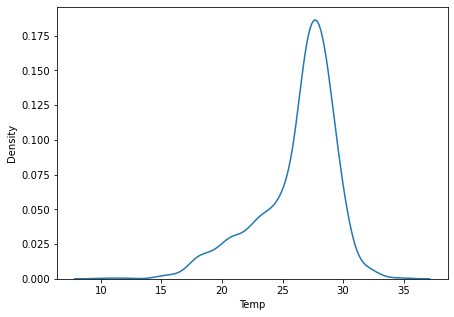

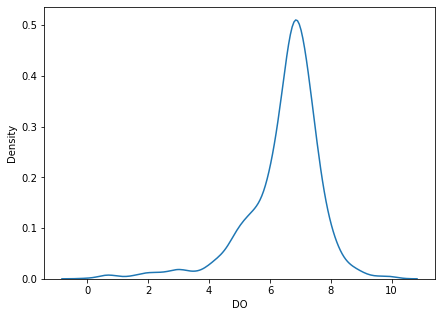

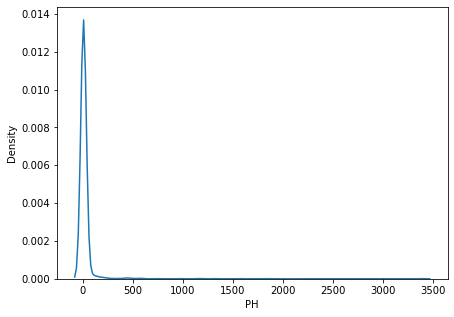

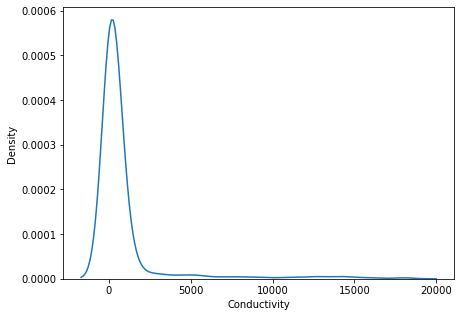

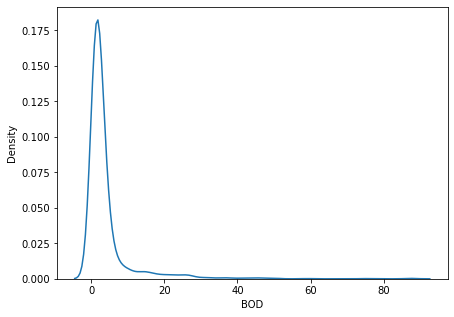

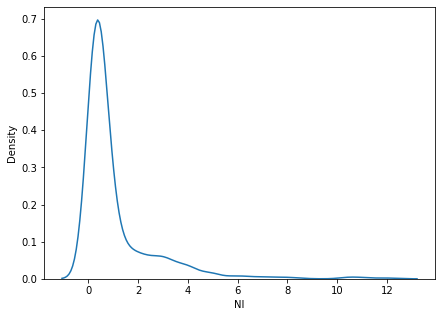

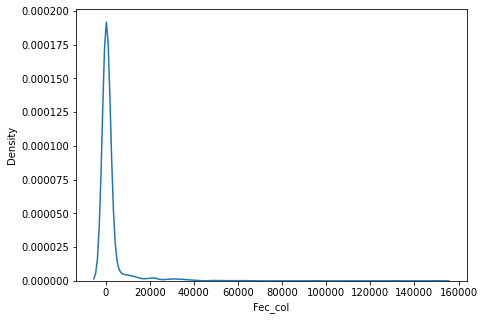

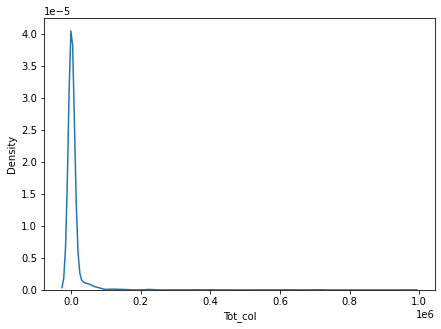

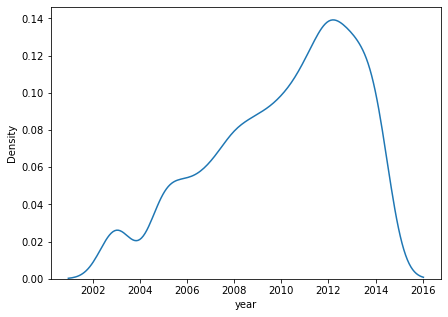

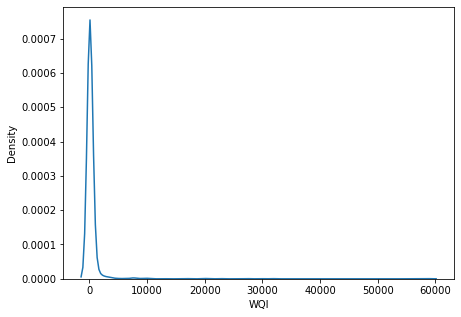

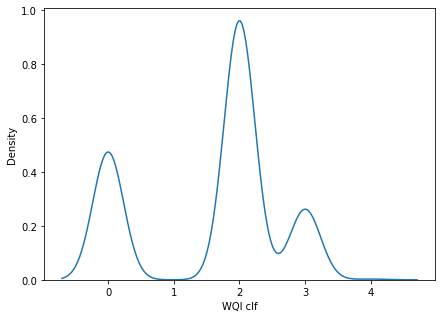

In [38]:
plot_kde(df_wqi.select_dtypes(exclude="object"))

In [39]:
df_wqi.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
count,1857.000000,1857.00000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,26.249024,6.46968,21.444437,914.469160,3.904589,1.088036,2163.068225,6992.528810,2010.059774,374.095071,1.599354
std,3.235525,1.24775,125.862427,2557.465581,7.002613,1.576473,8095.718660,39406.757235,3.044247,2189.980440,1.056568
min,10.000000,0.00000,2.900000,3.700000,0.100000,0.000000,0.000000,0.000000,2003.000000,16.795814,0.000000
25%,25.000000,6.00000,6.900000,76.000000,1.100000,0.270000,38.000000,113.000000,2008.000000,55.271272,0.000000
50%,27.000000,6.70000,7.300000,169.000000,1.800000,0.516000,221.000000,468.000000,2011.000000,71.845041,2.000000
75%,28.200000,7.20000,7.700000,439.000000,3.400000,1.010000,590.000000,1630.000000,2013.000000,101.752648,2.000000
max,35.000000,10.00000,3384.000000,18291.000000,88.000000,12.150000,150250.000000,967500.000000,2014.000000,58680.748613,4.000000


In [40]:
features = list(df_wqi.columns)[3:11]
data_f = df_wqi[features]
data_f.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col
count,1857.000000,1857.00000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,26.249024,6.46968,21.444437,914.469160,3.904589,1.088036,2163.068225,6992.528810
std,3.235525,1.24775,125.862427,2557.465581,7.002613,1.576473,8095.718660,39406.757235
min,10.000000,0.00000,2.900000,3.700000,0.100000,0.000000,0.000000,0.000000
25%,25.000000,6.00000,6.900000,76.000000,1.100000,0.270000,38.000000,113.000000
50%,27.000000,6.70000,7.300000,169.000000,1.800000,0.516000,221.000000,468.000000
75%,28.200000,7.20000,7.700000,439.000000,3.400000,1.010000,590.000000,1630.000000
max,35.000000,10.00000,3384.000000,18291.000000,88.000000,12.150000,150250.000000,967500.000000


In [41]:
features = list(df_wqi.columns)[:]
data_cluster = df_wqi['WQI clf']
data_cluster.describe()

count    1857.000000
mean        1.599354
std         1.056568
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: WQI clf, dtype: float64

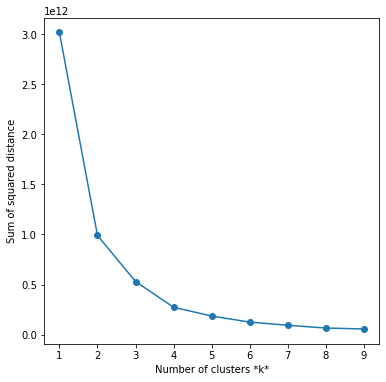

In [42]:
# normalize data
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data_f)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [43]:
data_f

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0
...,...,...,...,...,...,...,...,...
1857,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0
1858,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0
1859,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0
1860,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0


In [47]:
# data_f.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [48]:
# data_f.describe()

In [44]:
Y = data_cluster

In [45]:
features = list(df_wqi.columns)[3:11]
X = df_wqi[features]
X.describe()
X.dtypes

Temp            float64
DO              float64
PH              float64
Conductivity    float64
BOD             float64
NI              float64
Fec_col         float64
Tot_col         float64
dtype: object

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.34511362,  0.18463835, -0.11082095, ..., -0.62690663,
        -0.26589954, -0.17680737],
       [ 1.09779191, -0.6170203 , -0.11320514, ..., -0.56345682,
         0.344711  ,  0.03549767],
       [ 1.00504627, -0.13602511, -0.11558934, ..., -0.62690663,
         0.13343135, -0.04220029],
       ...,
       [ 0.54131807,  0.90613114,  0.60841178, ..., -0.36295544,
        -0.23995292, -0.16302429],
       [ 0.54131807,  0.986297  ,  0.55278052, ..., -0.36295544,
        -0.23995292, -0.16322736],
       [ 0.8504702 ,  0.90613114,  0.70377966, ..., -0.36295544,
        -0.23995292, -0.16363349]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=30)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
# model = LinearRegression()
# # model = LogisticRegression(solver='liblinear')
# model.fit(X_train,y_train)
# model.score(X_test,y_test)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
score = neigh.score(X_test,y_test)
print("score: ",score)
y_pred = neigh.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

score:  0.7473118279569892
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       106
           2       0.75      0.86      0.80       203
           3       0.52      0.39      0.44        62
           4       1.00      0.00      0.00         1

    accuracy                           0.75       372
   macro avg       0.78      0.50      0.51       372
weighted avg       0.74      0.75      0.74       372



In [50]:
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.8844086021505376


In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
forest_reg.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [58]:
X_train[0]

array([-1.53000125, -1.01784963, -0.11241041, -0.17579522, -0.42918241,
       -0.31600258, -0.26676443, -0.17726427])

In [59]:
!pip install ibm_watson_machine_learning

In [60]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey":"52-LcxwCL4xYpFsN3lS7NdbNGhgPHdk2rriIX2j2w9yQ"
                  }
client = APIClient(wml_credentials)

In [61]:
def guide_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [62]:
space_uid = guide_from_space_name(client,'models')
print("Space UID = "+ space_uid)

Space UID = 53c7b021-acca-42d8-8c30-0013661dac6e


In [63]:
client.set.default_space(space_uid)

'SUCCESS'

In [64]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [65]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid


'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
model_details = client.repository.store_model(model=forest_reg,meta_props={
    client.repository.ModelMetaNames.NAME:"water-quality-index-prediction",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)
model_id